In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Salary_Data_Exec.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
 2   IsExec           30 non-null     bool   
dtypes: bool(1), float64(2)
memory usage: 638.0 bytes


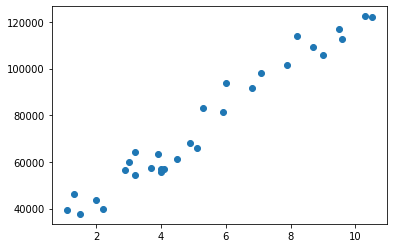

In [6]:
x = df['YearsExperience']
y = df['Salary']

plt.plot(x, y, 'o')

## Implementing Linear Regression

We first implement some support functions

In [7]:
from IPython.display import clear_output
def plot_result(x,y,m=1,b=0, is_classif=False):
    clear_output(wait=True)

    plt.plot(x, y, 'o')
    plt.plot(x, m*x + b)
    if is_classif:
        plt.ylim((-0.1,1.1))
    else:
        plt.ylim((0,140000))


    
    plt.show()

In [8]:
# linear regression functions
def predict(x, w, b = 0): # also known as y_hat. w weights, b bias, y^
    return x*w + b

In [9]:
def init_w(x):
    return np.ones(x.shape) # naive initialization, 1

def init_b(x):
    return 0 # naive initialization, 0

In [10]:
def compute_error(x, w, y, b=0):
    return predict(x,w, b) - y  #find each error between y^ and y

In [11]:
def compute_mse(x, w, y, b=0):
    return np.average(compute_error(x, w, y, b) ** 2) # MSE = 1/n (y-y^)^^2

## Training the model

### Salary = bias + weight * Years_of_Experience

In [12]:
def train(x, y, w, iterations, learning_rate=2):
    for i in range(iterations):
        current_loss = compute_mse(x, w, y)
        
        if i % 50 == 0:
            plot_result(x, y, w)
            print(f"Iteration: {i} Loss:{current_loss}")

        if compute_mse(x, w+learning_rate, y) < current_loss: 
            w += learning_rate #adding learning rate
        elif compute_mse(x, w-learning_rate, y) < current_loss:
            w -= learning_rate # minus the learning rate on w
        else:
            return w

#### First, without the bias

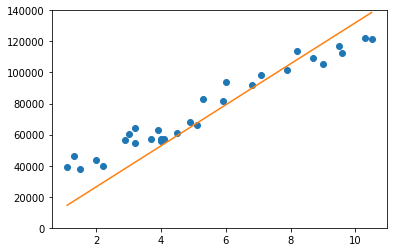

Iteration: 6600 Loss:175169669.35


In [11]:
weights = init_w(x) # set weights to zero
b = init_b(x) #initialized b as 0
weights = train(x, y, weights, 100000)

#### Now we add the bias. What is the difference?

In [13]:
def train_with_bias(x, y, w, b, iterations, learning_rate=5):
    for i in range(iterations):
        current_loss = compute_mse(x, w, y, b)
        
        if i % 50 == 0:
            plot_result(x, y, w, b)
            print(f"Iteration: {i} Loss:{current_loss}")


       
        if compute_mse(x, w, y, b + learning_rate) < current_loss:
            b += learning_rate
        elif compute_mse(x, w, y, b - learning_rate) < current_loss:
            b -= learning_rate
        elif compute_mse(x, w + learning_rate, y, b) < current_loss:
            w += learning_rate
        elif compute_mse(x, w - learning_rate, y, b) < current_loss:
            w -= learning_rate
        else:
            plot_result(x, y, w, b)

            print(f"Stopped at iteration {i} with loss {current_loss}")
            return w, b

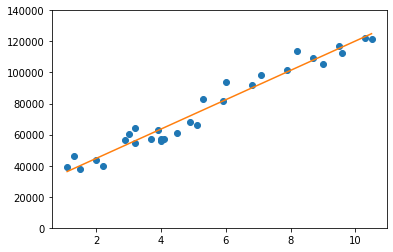

Stopped at iteration 27120 with loss 31271577.083333347


In [20]:
weights = init_w(x) # set weights to zero
bias = init_b(x)
weights, bias = train_with_bias(x, y, weights, bias, 100000) #normally starts with larger learning rate, then use small rate to fine tune the model

In [14]:
def compute_weights_gradient(x, y, w, b):
    return 2*np.average(x * (predict(x,w,b) -y))

def compute_bias_gradient(x,y,w,b):
    return 2*np.average(predict(x,w,b) -y)

In [15]:
def train_with_gradient(x, y, w, b, iterations, learning_rate=0.005, is_classif=False):
    previous_loss = 100000000000
    errors = []
    all_ws = []
    for i in range(iterations):
        current_loss = compute_mse(x, w, y, b)
        if abs(previous_loss - current_loss) < 1:
            break
        if i % 10 == 0:
            plot_result(x, y, w, b, is_classif)
            print(f"Iteration: {i} Loss:{current_loss}")
            errors.append(compute_error(x, w, y, b))
            all_ws.append((w, b))
            
        weight_gradient = compute_weights_gradient(x, y, w, b)
        bias_gradient = compute_bias_gradient(x,y,w,b)
        w -= weight_gradient*learning_rate
        b -= bias_gradient*learning_rate
        previous_loss = current_loss
    plot_result(x, y, w, b, is_classif)
    print(f"Stopped at iteration {i} with loss {current_loss}")
    return w, b

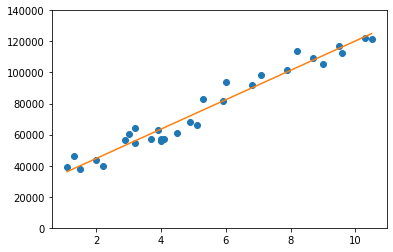

Stopped at iteration 3109 with loss 31271187.335337263


In [23]:
weights = init_w(x) # set weights to zero
bias = init_b(x)
weights, bias = train_with_gradient(x, y, weights, bias, 100000)

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston_data = load_boston(as_frame=True)
X = boston_data.data
y = boston_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

TypeError: load_boston() got an unexpected keyword argument 'as_frame'

In [18]:
weights = init_w(X_train) # set weights to zero
bias = init_b(X_train)
weights, bias = train_with_gradient(X_train, y_train, weights, bias, 100000)

ValueError: operands could not be broadcast together with shapes (339,13) (339,) 

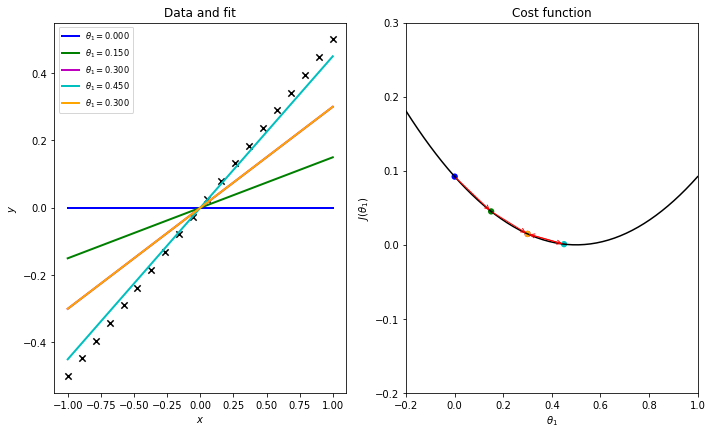

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time


def plot_gd(theta1_grid, theta1, J, J_grid, x, y):
    #Adapted from https://scipython.com/blog/visualizing-the-gradient-descent-method/
    time.sleep(2)
    clear_output(wait=True)
    # The plot: LHS is the data, RHS will be the cost function.
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
    ax[0].scatter(x, y, marker='x', s=40, color='k')
    ax[1].plot(theta1_grid, J_grid, 'k')
    
    
    # Annotate the cost function plot with coloured points indicating the
    # parameters chosen and red arrows indicating the steps down the gradient.
    # Also plot the fit function on the LHS data plot in a matching colour.
    colors = ['b', 'g', 'm', 'c', 'orange'][:len(J)]
    ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
    for j in range(1,len(J)):
        ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                       va='center', ha='center')
        ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
                   label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

    # Labels, titles and a legend.
    ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
    ax[1].set_xlim(-0.2,1)
    ax[1].set_ylim(-0.2,0.3)

    ax[1].set_xlabel(r'$\theta_1$')
    ax[1].set_ylabel(r'$J(\theta_1)$')
    ax[1].set_title('Cost function')
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$y$')
    ax[0].set_title('Data and fit')
    ax[0].legend(loc='upper left', fontsize='small')

    plt.tight_layout()
    plt.show()

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

def run_example(fixed_learning_rate=True):
    # The data to fit
    m = 20
    theta1_true = 0.5
    fake_x = np.linspace(-1,1,m)
    fake_y = theta1_true * fake_x
    # First construct a grid of theta1 parameter pairs and their corresponding
    # cost function values.
    theta1_grid = np.linspace(-0.2,1,50)
    J_grid = [compute_mse(fake_x, w, fake_y) for w in theta1_grid[:,np.newaxis]]

    # The cost function as a function of its single parameter, theta1.

    # Take N steps with learning rate alpha down the steepest gradient,
    # starting at theta1 = 0.
    N = 5
    alpha = 1.5 if not fixed_learning_rate else 0.15 
    theta1 = [0]
    J = [compute_mse(fake_x, theta1[0], fake_y)]
    for j in range(N-1):
        last_theta1 = theta1[-1]
        
        if not fixed_learning_rate:
            this_theta1 = last_theta1 - alpha / m * np.sum(
                                            (hypothesis(fake_x, last_theta1) - fake_y) * fake_x)
        else:
            if compute_mse(fake_x, last_theta1 + alpha, fake_y) < J[-1]:
                this_theta1 = last_theta1 + alpha
            else:
                this_theta1 = last_theta1 - alpha

        theta1.append(this_theta1)
        J.append(compute_mse(fake_x, this_theta1, fake_y))
        plot_gd(theta1_grid,theta1,J, J_grid, fake_x, fake_y)

run_example(True) #fixed learning rate as 0.15

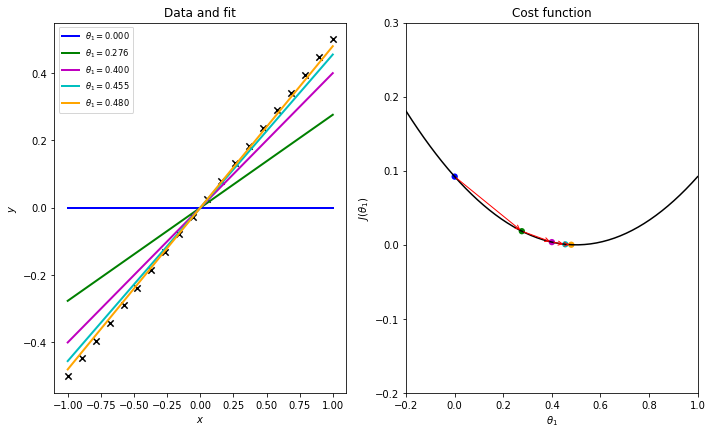

In [20]:
run_example(False) # not fixed rate

## Outliers

In [22]:
new_outlier = pd.DataFrame([{"Salary": 80000, "YearsExperience": 15, "IsExec": False}])

In [23]:
df_with_outlier = df.append(new_outlier, ignore_index=True)

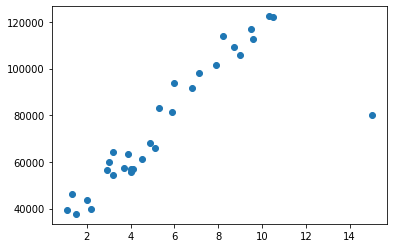

In [24]:
x = df_with_outlier['YearsExperience']
y = df_with_outlier['Salary']

plt.plot(x, y, 'o')

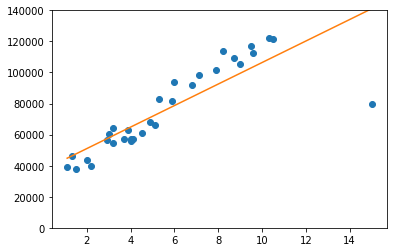

Stopped at iteration 798 with loss 202524186.2252356


In [25]:
weights = init_w(x) # set weights to zero
bias = init_b(x)
weights, bias = train_with_gradient(x, y, weights, bias, 100000, learning_rate=0.02) very sensitive to outliner

## Classification

In [38]:
x = df['YearsExperience']
y = df['IsExec']

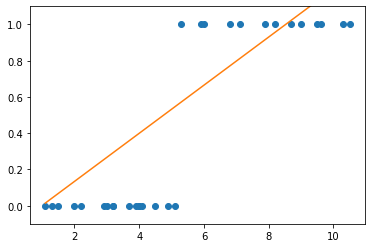

Stopped at iteration 3 with loss 0.08630321829207553


In [43]:
weights = init_w(x) # set weights to zero
bias = init_b(x)
weights, bias = train_with_gradient(x, y, weights, bias, 100000, learning_rate=0.01, is_classif=True) #positive class to the right and nagetive to the left

In [27]:
x = df_with_outlier['YearsExperience']
y = df_with_outlier['IsExec']

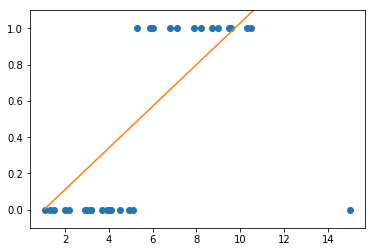

Stopped at iteration 2 with loss 0.15854100328319928


In [28]:
weights = init_w(x) # set weights to zero
bias = init_b(x)
weights, bias = train_with_gradient(x, y, weights, bias, 100000, learning_rate=0.01, is_classif=True)

## Logistic Regression

In [26]:
df['bias'] = 1
x = df[['YearsExperience', 'bias']].to_numpy()
# x['bias'] = 1
y = df['IsExec'].to_numpy().reshape((-1, 1))

In [27]:
def init_w_with_bias(x):
    return np.ones((x.shape[1], 1)) # naive initialization


def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict_logistic(x, w):
    return sigmoid(np.matmul(x,w)) #sigmoid function



In [28]:
def classify(x, w):
    return np.round(predict_logistic(x, w))


def plot_result_logistic_regression(x,y,w):
    clear_output(wait=True)
#     print(x, y, w)
    plt.plot(x[:,0], y, 'o')
    plt.plot(x[:,0], sigmoid(np.matmul(x,w)))
    plt.plot(x[:,0], classify(x, w))
    
    plt.ylim((-0.1,1.1))


    plt.show()
    
def plot_loss_metric(iterations, loss, test_loss):
    clear_output(wait=True)
#     plt.plot(iterations, loss, label='train')
#     plt.plot(iterations, test_loss, label='test')
    plt.ylim((-0.1,0.5))

    train, =  plt.plot(iterations, loss, label='train')
    test, = plt.plot(iterations, test_loss, label='test')
    plt.legend(handles=[train, test])
    plt.show()


In [29]:
weights = init_w_with_bias(x) # set weights to zero

In [30]:
lambda_v_default = 1e-4

def logloss(x, y, w):
    y_hat = predict_logistic(x, w)
    first_term = y*np.log(y_hat)
    second_term = (1-y) * np.log(1-y_hat)
    L = -np.average(first_term + second_term)  #minus cross-entropy (log loss)
    return L

def l2loss(w, lambda_v=lambda_v_default):
    return 1/2 * lambda_v *np.matmul(w.T, w)[0][0]
    


In [31]:
def compute_gradients_logistic(x, y, w):    
    grad=  np.matmul(x.T, (predict_logistic(x,w) - y))/x.shape[0]
    return grad

def compute_gradients_with_l2(x, y, w, lamba_v=lambda_v_default):
    return compute_gradients_logistic(x, y, w) + 2*lamba_v*w

In [32]:
def train_with_gradient_logistic_regression(x, y, w, iterations, learning_rate=0.01, reg=False):
    previous_loss = 100000000000
    for i in range(iterations):
        current_loss = logloss(x, y, w) + (0 if not reg else l2loss(w))
        if abs(previous_loss - current_loss) < 10**-7:
            break
        
        if i % 1000 == 0:
            plot_result_logistic_regression(x, y , w)
            accuracy = sum(classify(x, w) == y)/len(y)

            print(f"Iteration: {i} Loss:{current_loss} Accuracy: {accuracy}")
        weight_gradient = compute_gradients_logistic(x, y, w) if not reg else compute_gradients_with_l2(x, y, w)
        
        w -= learning_rate*weight_gradient 
        previous_loss = current_loss
    plot_result_logistic_regression(x, y , w)
    accuracy = sum(classify(x, w) == y)/len(y)

    print(f"Stopped at iteration {i} with loss {current_loss} and accuracy {accuracy[0]}")
    return w

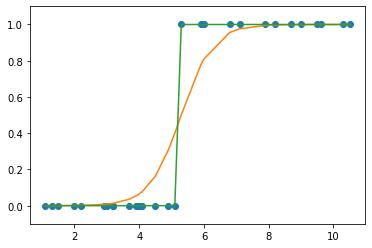

Stopped at iteration 59999 with loss 0.09424061133847778 and accuracy 1.0


In [33]:
weights = init_w_with_bias(x) # set weights to zero
weights = train_with_gradient_logistic_regression(x, y, weights, iterations=60000, reg=True)

### Outliers

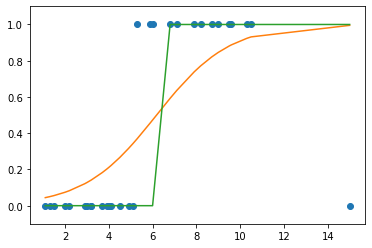

Stopped at iteration 14411 with loss 0.4299183409415624 and accuracy 0.8709677419354839


In [34]:
df_with_outlier['bias'] = 1
x = df_with_outlier[['YearsExperience', 'bias']].to_numpy()
# x['bias'] = 1
y = df_with_outlier['IsExec'].to_numpy().reshape((-1, 1))

weights = init_w_with_bias(x) # set weights to zero
weights = train_with_gradient_logistic_regression(x, y, weights, iterations=60000, reg=True)

### Train and Test loss functions

In [35]:
from sklearn.model_selection import train_test_split
df['bias'] = 1
x = df[['YearsExperience', 'bias']].to_numpy()
# x['bias'] = 1
y = df['IsExec'].to_numpy().reshape((-1, 1))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [37]:
def train_with_gradient_logistic_regression_train_test(x, y, x_test, y_test, w,  iterations, learning_rate=0.1, reg=False):
    previous_loss = 100000000000
    loss = []
    metric = []
    test_loss = []
    test_metric = []
    iterations_count = []
    for i in range(iterations):
        current_loss = logloss(x, y, w) + (0 if not reg else l2loss(w))
        if abs(previous_loss - current_loss) < 10**-10:
            break
            
        if i % 10000 == 0:
            loss.append(current_loss)
            accuracy = sum(classify(x, w) == y)/len(y)
            test_accuracy = sum(classify(x_test, w) == y_test)/len(y_test)
            
            current_test_loss = logloss(x_test, y_test, w) + (0 if not reg else l2loss(w))
            test_loss.append(current_test_loss)
            iterations_count.append(i)
#             print(len(loss), len(test_loss), len(iterations_count))
            plot_loss_metric(iterations_count, loss, test_loss)
            print(current_test_loss/ current_loss)

            
            
            print(f"Iteration: {i} Loss:{current_loss}")
        weight_gradient = compute_gradients_logistic(x, y, w)  if not reg else compute_gradients_with_l2(x, y, w)
        w -= learning_rate*weight_gradient
        previous_loss = current_loss
#     plot_result_logistic_regression(x_test, y_test , w)
    print(f"Stopped at iteration {i} with loss {current_loss}")
    return w

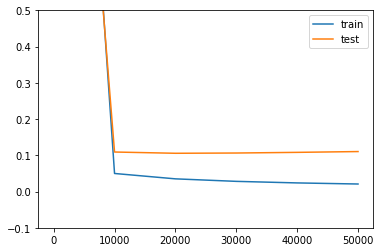

5.297619371004412
Iteration: 50000 Loss:0.02083522556998173
Stopped at iteration 59999 with loss 0.0185676638958132


In [38]:
weights = init_w_with_bias(x) # set weights to zero
weights = train_with_gradient_logistic_regression_train_test(X_train, y_train, X_test, y_test, weights, iterations=60000)

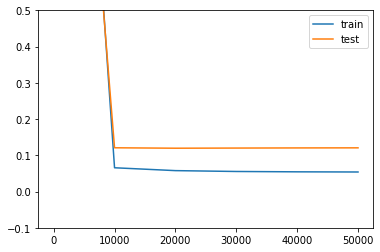

2.2342510247213463
Iteration: 50000 Loss:0.05399290882040505
Stopped at iteration 59999 with loss 0.053768155397749706


In [39]:
weights = init_w_with_bias(x) # set weights to zero
weights = train_with_gradient_logistic_regression_train_test(X_train, y_train, X_test, y_test, weights, iterations=60000, reg=True)# adding regulization